In [22]:
data = pd.read_csv('sample data/Iris.csv')

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import pyttsx3
#from bot import get_mode

engine = pyttsx3.init()
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[1].id)
volume = engine.getProperty('volume')
engine.setProperty('volume', 10.0)
rate = engine.getProperty('rate')
engine.setProperty('rate', rate - 30)


def gen_output(mode, text):
	if mode == 'TEXT':
		print(text)
	elif mode == 'VOICE':
		engine.say(text)
		print(text)
		engine.runAndWait()

In [4]:
gen_output('TEXT', 'Hi')

Hi


In [5]:
gen_output('VOICE', 'Hi')

Hi


In [24]:
from rasa_nlu.model import Interpreter
from word2number import w2n

In [78]:
interpreter = Interpreter.load("./models/nlu/default/tensor")

INFO:tensorflow:Restoring parameters from ./models/nlu/default/tensor\intent_classifier_tensorflow_embedding.ckpt


In [79]:
intent = interpreter.parse('can you plot a line graph')

In [80]:
intent

{'intent': {'name': 'visualize', 'confidence': 0.9142727851867676},
 'entities': [{'start': 15,
   'end': 25,
   'value': 'line plot',
   'entity': 'plot_type',
   'confidence': 0.5465747272519716,
   'extractor': 'ner_crf',
   'processors': ['ner_synonyms']}],
 'intent_ranking': [{'name': 'visualize', 'confidence': 0.9142727851867676},
  {'name': 'features', 'confidence': 0.21153828501701355},
  {'name': 'upload_data', 'confidence': 0.08661969006061554},
  {'name': 'describe_data', 'confidence': 0.03157317638397217},
  {'name': 'clean_data', 'confidence': 0.0019378755241632462},
  {'name': 'build_model', 'confidence': 0.0},
  {'name': 'data_exploration', 'confidence': 0.0}],
 'text': 'can you plot a line graph'}

In [27]:
print(text['entities'][1]['value'])
print(text['entities'][1]['entity'])

six
number


In [28]:
row = text['entities'][1]['value']

In [29]:
w2n.word_to_num(row)

6

In [118]:
get_intent('hello')

INFO:tensorflow:Restoring parameters from ./models/nlu/default/tensor\intent_classifier_tensorflow_embedding.ckpt


('error', 0)

In [49]:
intent['intent']['name']

'data_exploration'

In [50]:
intent['entities'][0]['entity']

'head'

In [51]:
intent['entities'][0]['value']

'top'

In [52]:
intent['entities'][1]['entity']

'number'

In [53]:
intent['entities'][1]['value']

'5'

In [54]:
len(intent['entities'])

2

In [55]:
if len(intent['entities'])>0:
    for i in range(len(intent['entities'])):
        print(intent['entities'][i]['entity'])
        print(intent['entities'][i]['value'])

head
top
number
5


In [59]:
intent['intent']['confidence']

0.969823956489563

In [30]:
import pdfkit
import pandas as pd
import base64
import uuid
import glob
import os

In [38]:
path_wkthmltopdf = r'C:\Users\Shoumik\Desktop\Jupyter\voice bot\Machine-learning-Voice-Assistant-master\Machine-learning-Voice-Assistant- v0.5\wkhtmltox\bin\wkhtmltopdf.exe'
config = pdfkit.configuration(wkhtmltopdf=path_wkthmltopdf)

In [3]:
options = {
    'page-size': 'Letter',
    'margin-top': '0.75in',
    'margin-right': '0.75in',
    'margin-bottom': '0.75in',
    'margin-left': '0.75in',
    'encoding': "UTF-8",
    'custom-header' : [
        ('Accept-Encoding', 'gzip')
    ],
    'cookie': [
        ('cookie-name1', 'cookie-value1'),
        ('cookie-name2', 'cookie-value2'),
    ],
    'no-outline': None
}

In [4]:
data = pd.read_csv('sample data/Iris.csv')

In [7]:
with open('test.html', 'w') as fo:
    fo.write(data.to_html())

In [19]:
pdfkit.from_file('test.html', 'test.pdf',configuration=config)

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

In [5]:
a = tempfile.TemporaryFile()

In [23]:
filename = uuid.uuid4().hex+'.html'

In [24]:
filename

'587fbf2432b74c54a60d451947d2e7a9.html'

In [92]:
def write_to_html_file(df, title='', image =''):
    '''
    Write an entire dataframe to an HTML file with nice formatting.
    '''

    result = '''
    <!doctype html>
    <html lang="en">
       <head>
          <meta charset="utf-8">
          <link rel="stylesheet" href="./css/style.css">
       </head>
       <body>
          <div id="ijx4">Report Created by : Intelli - Report Curator</div>
          <div id="ivtw">FundsNetwork</div>
          <section class="bdg-sect">
             <h1 class="heading">Data Report</h1>
             <p class="paragraph">Dear user, here is your personalized report</p>
          </section>
          <style>
    
        h2 {
            text-align: center;
            font-family: Helvetica, Arial, sans-serif;
        }
        table { 
            margin-left: auto;
            margin-right: auto;
        }
        table, th, td {
            border: 1px solid black;
            border-collapse: collapse;
        }
        th, td {
            padding: 5px;
            text-align: center;
            font-family: Helvetica, Arial, sans-serif;
            font-size: 90%;
        }
        table tbody tr:hover {
            background-color: #dddddd;
        }
        .wide {
            width: 90%; 
        }

            </style>
        <br>
        <style>
        img {
            display: block;
            margin-left: auto;
            margin-right: auto;
            }
        </style>
       </body>
       <html>
    '''
    result += '<h2> %s </h2>\n' % title
    result += df.to_html(classes='wide', escape=False)
    result += '<br>'
    result += image
    result += '''
    </body>
    </html>
    '''
    save_path = './download/'
    filename = uuid.uuid4().hex
    filepath = os.path.join(save_path, filename+'.html')         
    with open(filepath, 'w') as f:
        f.write(result)

In [15]:
data_uri = base64.b64encode(open('download.jpg', 'rb').read()).decode('utf-8').replace('\n', '')

In [16]:
img_tag = '<img src="data:image/png;base64,{0}";>'.format(data_uri)

In [44]:
write_to_html_file(data,'Table',img_tag)

In [33]:
list_of_files = glob.glob('./download/*')
latest_file = max(list_of_files, key=os.path.getctime)

In [34]:
latest_file

'./download\\2cd7a8c6cb0644e793f50793ce10bd08.html'

In [39]:
try:
    pdfkit.from_file(latest_file, './download/'+uuid.uuid4().hex+'.pdf',configuration=config, options = options)
except:
    pass

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


In [80]:
import pdfkit
import pandas as pd
import base64
import uuid
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
def gen_image_64(img):
    data_uri = base64.b64encode(open('./temp/'+img+'.jpg', 'rb').read()).decode('utf-8').replace('\n', '')
    img_tag = '<img src="data:image/png;base64,{0}";>'.format(data_uri)
    return img_tag

In [57]:
img_list = []
df_list = []

In [91]:
def write_to_html_file(df_list, image_list, title='Table'):
    '''
    Write an entire dataframe to an HTML file with nice formatting.
    '''

    result = '''
    <!doctype html>
    <html lang="en">
       <head>
          <meta charset="utf-8">
          <link rel="stylesheet" href="./css/style.css">
       </head>
       <body>
          <div id="ijx4">Report Created by : Intelli - Report Curator</div>
          <div id="ivtw">FundsNetwork</div>
          <section class="bdg-sect">
             <h1 class="heading">Fee Report</h1>
             <p class="paragraph">Dear Adviser, here is your personalized fee report</p>
          </section>
          <style>
    
        h2 {
            text-align: center;
            font-family: Helvetica, Arial, sans-serif;
        }
        table { 
            margin-left: auto;
            margin-right: auto;
        }
        table, th, td {
            border: 1px solid black;
            border-collapse: collapse;
        }
        th, td {
            padding: 5px;
            text-align: center;
            font-family: Helvetica, Arial, sans-serif;
            font-size: 90%;
        }
        table tbody tr:hover {
            background-color: #dddddd;
        }
        .wide {
            width: 90%; 
        }

            </style>
        <br>
        <style>
        img {
            display: block;
            margin-left: auto;
            margin-right: auto;
            }
        </style>
       </body>
       <html>
    '''
    if len(df_list)>0:
        for i in df_list:
            result += '<h2> %s </h2>\n' % title
            result += i.to_html(classes='wide', escape=False)
            result += '<br>'
    result += '<br>'
    if len(image_list)>0:
        for i in image_list:
            result += i
            result += '<br>'
    result += '''
    </body>
    </html>
    '''
    save_path = './download/'
    filename = uuid.uuid4().hex
    filepath = os.path.join(save_path, filename+'.html')         
    with open(filepath, 'w') as f:
        f.write(result)

In [65]:
def gen_pdf(df_list, image_list):
    write_to_html_file(df_list,image_list,'Table')
    list_of_files = glob.glob('./download/*')
    latest_file = max(list_of_files, key=os.path.getctime)
    try:
        pdfkit.from_file(latest_file, './download/'+uuid.uuid4().hex+'.pdf',configuration=config, options = options)
    except:
        pass

In [55]:
df1 = pd.read_csv('./sample data/Iris.csv')

In [59]:
df2 = pd.read_csv('./sample data/breastcancer.csv')

In [60]:
df_list.append(df1)
df_list.append(df2)

In [66]:
gen_pdf(df_list,'')

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


C:\Users\Shoumik\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


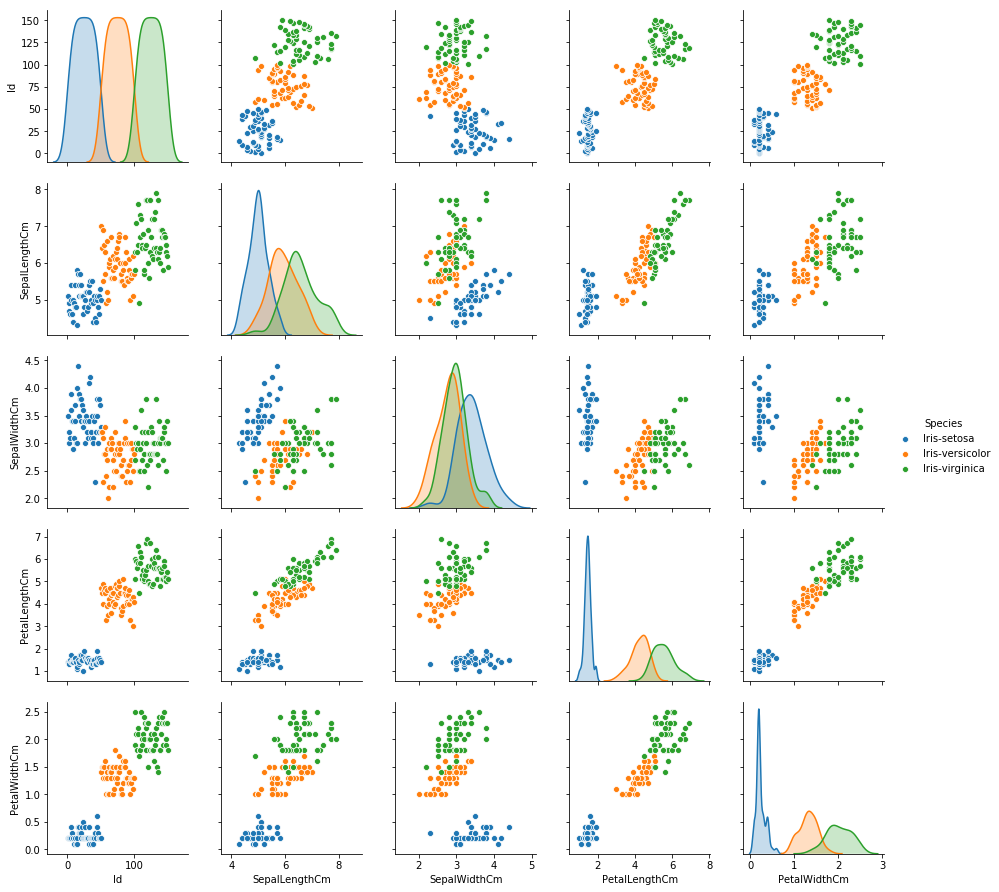

In [87]:
sns_plot = sns.pairplot(df1, hue='Species', size=2.5)
image_name = uuid.uuid4().hex
sns_plot.savefig('./temp/'+image_name+'.jpg')
img = gen_image_64(image_name)               

In [89]:
img_list.append(img)

In [90]:
gen_pdf(df_list,img_list)

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


In [104]:
def barplot(x_data, y_data):
	x_label = x_data.name
	y_label = y_data.name
	fig, ax = plt.subplots()
	# Draw bars, position them in the center of the tick mark on the x-axis
	ax.bar(x_data, y_data, color = '#539caf', align = 'center')
	# Draw error bars to show standard deviation, set ls to 'none'
	# to remove line between points
	#ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
	ax.set_ylabel(y_label)
	ax.set_xlabel(x_label)
	ax.set_title('Bar plot')
	plt.show()
	return fig

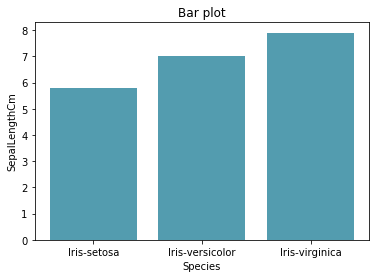

In [105]:
plot = barplot(df1['Species'],df1['SepalLengthCm'])

In [106]:
image_name = uuid.uuid4().hex
plot.savefig('./temp/'+image_name+'.jpg')
img = gen_image_64(image_name)   

''
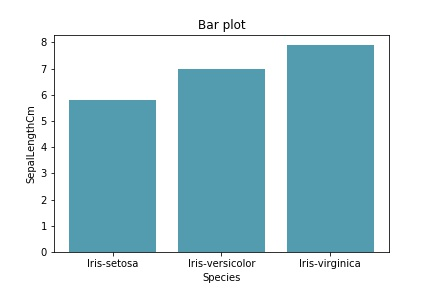

In [107]:
img

In [125]:
def gen_image_64(plot):
	image_name = uuid.uuid4().hex
	plot.savefig('./temp/'+image_name+'.jpg')
	data_uri = base64.b64encode(open('./temp/'+image_name+'.jpg', 'rb').read()).decode('utf-8').replace('\n', '')
	img_tag = '<img src="data:image/png;base64,{0}";>'.format(data_uri)
	return img_tag

In [128]:
def cmd_add_to_pdf(data,plot):
	if (len(data)!=0) & (plot!=''):
		df_list.append(data)
		img = gen_image_64(plot)
		img_list.append(img)
		print('Done!')
	elif (len(data)!=0) & (plot==''):
		df_list.append(data)
		print('Done!')
	elif (len(data)==0) & (plot!=''):
		img = gen_image_64(plot)
		img_list.append(img)
		print('Done!')

In [129]:
cmd_add_to_pdf('',plot)

Done!


In [118]:
int(plot)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Figure'

In [132]:
from rasa_nlu.model import Interpreter
def get_intent(text):
	command_type = ''
	model_type = 0
	plot_type = 0
	explore_type = ''
	row_num = 0

	interpreter = Interpreter.load("./models/nlu/default/tensor")
	intent = interpreter.parse(text)
	
	if intent['intent']['confidence']>0.60:
		command_type = intent['intent']['name']
		if len(intent['entities']) == 0:
			model_type = 0
			plot_type = 0
		elif len(intent['entities']) == 1:
			if intent['entities'][0]['entity']=='plot_type':
				plot_type = intent['entities'][0]['value']
				model_type = 0
			elif intent['entities'][0]['entity']=='model_name':
				model_type = intent['entities'][0]['value']
				plot_type = 0
			else:
				explore_type = intent['entities'][0]['entity']
				model_type = 0
				plot_type = 0
				command_type = ''
		elif len(intent['entities']) == 2:
			explore_type = intent['entities'][0]['entity']
			row_num = w2n.word_to_num(intent['entities'][1]['value'])
			model_type = 0
			plot_type = 0
			command_type = ''
	else:
		command_type = 'error'

	if command_type == 'upload_data':
		cmd = '1U'
	elif command_type == 'describe_data':
		cmd = '2D'
	elif command_type == 'clean_data':
		cmd = '3C'
	elif command_type == 'features':
		cmd = '4F'
	elif command_type == 'visualize':
		cmd = '5V'
	elif command_type == 'build_model':
		cmd = '6B'
	elif command_type == 'data_exploration':
		cmd = '7E'
	elif command_type == 'add_pdf':
		cmd = '8PA'
	elif command_type == 'create_pdf':
		cmd = '9PC'
	elif (model_type != 0) & (command_type != 'error'):
		cmd = 'model'
	elif (plot_type != 0) & (command_type != 'error'):
		cmd = 'plot'    
	elif command_type == 'error':
		cmd = 'error'    
	else:
		cmd = 'error'  
	if model_type == 'logistic regression':
		model_type = 'LR'
	elif model_type == 'kneighbors':
		model_type = 'KNN'
	elif model_type == 'decision tree':
		model_type = 'CART'
	elif model_type == 'gaussian nb':
		model_type = 'NB'
	elif model_type == 'support vector':
		model_type = 'SVC'
	else:
		model_type = 0
		
	if len(command_type)>0:
		if (plot_type == 0):
			return cmd, model_type
		elif (model_type == 0) & (plot_type != 0):
			return cmd, plot_type
	elif (len(explore_type)>0) & (len(command_type)==0):
		return explore_type, row_num

In [135]:
get_intent('who sold the most by units')

INFO:tensorflow:Restoring parameters from ./models/nlu/default/tensor\intent_classifier_tensorflow_embedding.ckpt


('sales_type', 0)

In [136]:
data = pd.read_csv('./sample data/OfficeSupplies.csv')

In [142]:
data.apply(lambda x: x.astype(str).str.lower())

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Price
0,04-jul-14,east,richard,pen set,62,4.99,309.38
1,12-jul-14,east,nick,binder,29,1.99,57.71
2,21-jul-14,central,morgan,pen set,55,12.49,686.95
3,29-jul-14,east,susan,binder,81,19.99,1619.19
4,07-aug-14,central,matthew,pen set,42,23.95,1005.9
5,15-aug-14,east,richard,pencil,35,4.99,174.65
6,24-aug-14,west,james,desk,3,275.0,825.0
7,01-sep-14,central,smith,desk,2,125.0,250.0
8,10-sep-14,central,bill,pencil,7,1.29,9.03
9,18-sep-14,east,richard,pen set,16,15.99,255.84


In [143]:
data['Rep'].unique

<bound method Series.unique of 0     Richard
1        Nick
2      Morgan
3       Susan
4     Matthew
5     Richard
6       James
7       Smith
8        Bill
9     Richard
10      James
11     Morgan
12     Thomas
13    Richard
14     Rachel
15      Susan
16       Alex
17    Matthew
18       Alex
19      Smith
20     Rachel
21      Susan
22    Richard
23       Bill
24    Matthew
25      Smith
26       Alex
27    Richard
28       Bill
29      James
30      James
31       Alex
32    Richard
33     Rachel
34     Rachel
35       Nick
36       Alex
37       Bill
38     Thomas
39       Bill
40    Richard
41    Matthew
42     Morgan
Name: Rep, dtype: object>

In [144]:
data[data['Rep']=='Alex']

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Price
16,17-Nov-14,Central,Alex,Binder,11,4.99,54.89
18,04-Dec-14,Central,Alex,Binder,94,19.99,1879.06
26,09-Feb-15,Central,Alex,Pencil,36,4.99,179.64
31,24-Mar-15,Central,Alex,Pen Set,50,4.99,249.50
36,05-May-15,Central,Alex,Pencil,90,4.99,449.10


In [148]:
data.groupby(['Region']).sum().sort_values('Total Price', ascending=False).reset_index()

,Region,Units,Unit Price,Total Price
0,Central,1199,432.45,11139.07
1,East,691,118.87,6002.09
2,West,231,321.95,2486.72


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
OrderDate      43 non-null object
Region         43 non-null object
Rep            43 non-null object
Item           43 non-null object
Units          43 non-null int64
Unit Price     43 non-null float64
Total Price    43 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.4+ KB


In [152]:
data['Rep'] = data['Rep'].str.lower()

In [153]:
data

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Price
0,04-Jul-14,East,richard,Pen Set,62,4.99,309.38
1,12-Jul-14,East,nick,Binder,29,1.99,57.71
2,21-Jul-14,Central,morgan,Pen Set,55,12.49,686.95
3,29-Jul-14,East,susan,Binder,81,19.99,1619.19
4,07-Aug-14,Central,matthew,Pen Set,42,23.95,1005.90
5,15-Aug-14,East,richard,Pencil,35,4.99,174.65
6,24-Aug-14,West,james,Desk,3,275.00,825.00
7,01-Sep-14,Central,smith,Desk,2,125.00,250.00
8,10-Sep-14,Central,bill,Pencil,7,1.29,9.03
9,18-Sep-14,East,richard,Pen Set,16,15.99,255.84
